In [1]:
from termcolor import colored
print(colored('hello', 'red'), colored('world', 'green'))
print(colored("hello red world", 'red'))

hello world
hello red world


In [198]:
out = [{'.': [[332, 124]]},
{'ح': [[331, 150], [336, 149], [354, 169], [318, 169]]},
{'ا': [[321, 170], [315, 169], [308, 162], [303, 124]]},
{'ل': [[286, 119], [286, 157], [282, 163], [268, 163]]},
{'د': [[250, 144], [260, 156], [264, 172], [259, 176], [244, 176], [238, 171]]}]

In [199]:
colors = ['red', 'green', 'blue', 'magenta', 'grey']

In [200]:
for i, ins in enumerate(out):
    print(colored(ins, colors[i]))

{'.': [[332, 124]]}
{'ح': [[331, 150], [336, 149], [354, 169], [318, 169]]}
{'ا': [[321, 170], [315, 169], [308, 162], [303, 124]]}
{'ل': [[286, 119], [286, 157], [282, 163], [268, 163]]}
{'د': [[250, 144], [260, 156], [264, 172], [259, 176], [244, 176], [238, 171]]}


In [25]:
from PIL import Image, ImageDraw
import json
import numpy as np

def img_from_stroke(drawing):
    img_A = Image.new('RGB', (600, 600), (255, 255, 255)) 
    draw = ImageDraw.Draw(img_A) 
    for j, item in enumerate(drawing):
        char = list(item.keys())[0]
        stroke = item[char]
        if len(stroke) == 1:
            x, y = stroke[0]
            stroke.append([x+5, y+5])
        for i, point in enumerate(stroke):
            if i == 0:
                x_prev, y_prev = point
                continue
            x, y = point 
            draw.line([x_prev, y_prev, x, y], fill=colors[j], width = 3)
            x_prev, y_prev = x, y
    return img_A

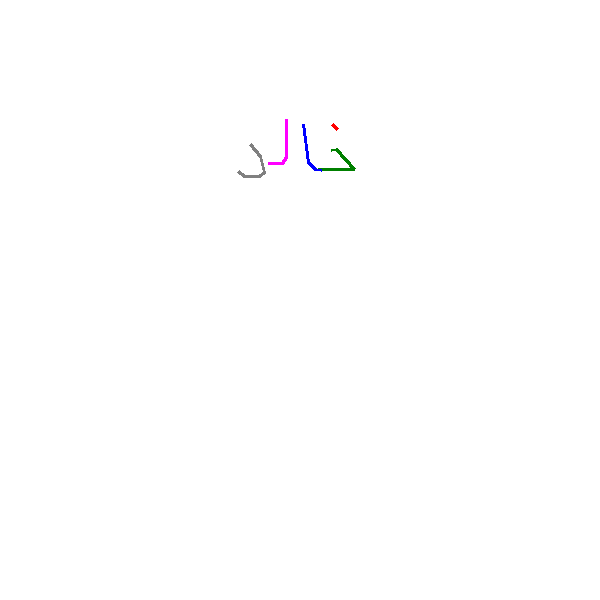

In [26]:
img_from_stroke(out)

In [31]:
import numpy as np
import math, json
from rdp import rdp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import tqdm.notebook as tq
import pickle
from collections import defaultdict
import cairosvg
from PIL import Image,ImageDraw
import glob
import os 
import re
import svgwrite

In [32]:
def convert_3d(drawing, return_flag = False, threshold=50):
    out = []
    corrupted = False
    for item in drawing:
        char = list(item.keys())[0]
        stroke = item[char]
        if len(stroke) == 1:
            x, y = stroke[0]
            out.append([x, y, 0])
            out.append([x+5, y+5, 1])
            continue
        segment = []
        for i, point in enumerate(stroke):
            x, y = point 
            if i == len(stroke) - 1:
                segment.append([x, y, 1])
            else:
                segment.append([x, y, 0])
        
        start = 0 
        out += segment[start:]
    if return_flag:
        return out, corrupted
    return out

In [190]:
def get_bounds(data):
    minx, miny = 600, 600  
    maxx, maxy = 0, 0
    
    for i, (x, y, z) in enumerate(data): 
        if minx > x:
            minx = x
        if miny > y:
            miny = y 

        if maxx < x:
            maxx = x
        if maxy < y:
            maxy = y 
    return minx, maxx, miny, maxy

def draw_strokes(data, factor=1, svg_filename = 'tmp/sample.svg', stroke_width = 3, square = False, return_res = False):
    min_x, max_x, min_y, max_y = get_bounds(data)
    margin_x = (600 - max_x - min_x)/2
    margin_y = (600 - max_y - min_y)/2
    
    data = [[x + margin_x, y + margin_y, z] for [x, y, z] in data]
    
    min_x, max_x, min_y, max_y = get_bounds(data)
    dims = ( 5 + max_x - min_x,  5 +max_y - min_y)
    dwg = svgwrite.Drawing(svg_filename, size = dims)
    dwg.add(dwg.rect(insert=(0, 0), size=dims,fill='white'))
    lift_pen = 0
    abs_x = 25 - min_x 
    abs_y = 25 - min_y
    p = "M%s,%s " % (min_x, min_y)
    command = "M"
    j = 0 
    for i in range(0, len(data)):
        x = float(data[i][0]) - min_x
        y = float(data[i][1]) - min_y
        lift_pen = data[i][2]
        p += command+str(x)+" "+str(y)+" " 
        
        if (lift_pen == 1):
            command = "M"
            dwg.add(dwg.path(p).stroke(colors[j],stroke_width).fill("none"))
            p = ""
            j += 1
        else:
            command = "" 
    
    dwg.save()
    cairosvg.svg2png(url="tmp/sample.svg", write_to="tmp/sample.png")
    img = Image.open('tmp/sample.png')
    img = make_square(img)
    return img

In [194]:
import json 
file = 'dataset/train/'+'عمر_15.json'
drawing = json.load(open(file, 'r'))

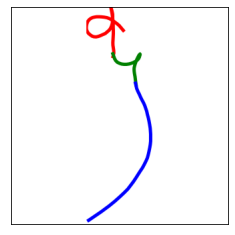

In [195]:
data = convert_3d(drawing)
plt.imshow(draw_strokes(data, stroke_width = 5))
plt.xticks([])
plt.yticks([])
plt.show()